Ref.: Wirth paper, pages 4 & 5.

Since the simulation is done on a rectangle, say $[0,a]\times[0,b]$, with periodic conditions on the edges, we can calculate the bidimensional Fourier series:
$$\theta'_{tp}(\vec x)=\sum_{m,n}\hat{\theta}_{tp}(\vec k_{m,n})e^{i\vec k_{m,n}\cdot\vec x}$$
where $\vec k_{m,n}=\left(\frac{2\pi m}a,\frac{2\pi n}b\right)$ and
$$\hat{\theta}_{tp}(\vec k_{m,n})=\frac4{ab}\int_0^a\int_0^b \theta'_{tp}(\vec x)e^{i\vec k_{m,n}\cdot\vec x}\mathrm dy\mathrm dx$$


blablabla

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

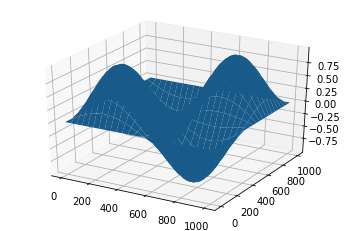

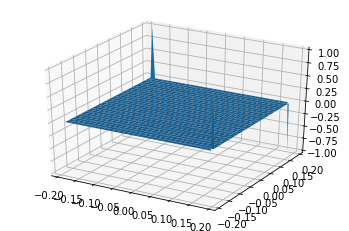

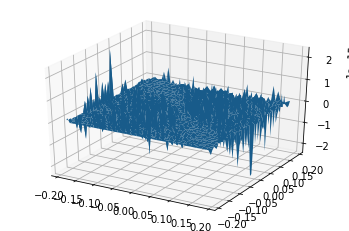

In [32]:
# Constants
N = 1
f = 1
K = 1
theta00 = 1
g = 1
Ns = 1
Nt = 1
pâté = g*(Ns-Nt)/(theta00*Ns*Nt*K)

# Initial data and Fourier series
a, b = 1000, 1000
Pa, Pb = 50,50 # samples
thetatp = np.zeros((Pa+1,Pb+1)) # periodic [Pa]=[0]

for i in range(Pa+1):
    for j in range(Pb+1):
        thetatp[i,j] = np.sin(2*i*np.pi/Pa)*np.sin(2*j*np.pi/Pb)

fig = plt.figure()
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(np.linspace(0,a,Pa+1), np.linspace(0,b,Pb+1))
ax.plot_surface(X,Y,thetatp)
plt.show()

Qa, Qb = 30,30 # modes
thetatphat = np.zeros((2*Qa+1,2*Qb+1),dtype=complex)

for m in range(-Qa,Qa+1):
    for n in range(-Qb, Qb+1):
        for i in range(Pa): # rectangle/trapezium rule
            for j in range(Pb):
                thetatphat[m,n] += thetatp[i,j]*np.exp(-2j*np.pi*((m*i/Pa+n*j/Pb)))
        thetatphat[m,n] *= 4/(Pa*Pb)

fig = plt.figure()
ax = plt.axes(projection='3d')
X,Y = np.meshgrid(np.linspace(-2*np.pi*Qa/a, 2*np.pi*Qa/a, 2*Qa+1),\
                  np.linspace(-2*np.pi*Qb/b, 2*np.pi*Qb/b, 2*Qb+1))
ax.plot_surface(X,Y,np.real(thetatphat))
plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,np.imag(thetatphat))
plt.show()
